In [26]:
import os
import numpy as np
import SimpleITK as sitk
from mpl_toolkits.mplot3d import Axes3D

In [30]:
# "./training/dataset00/vessel%s/reference.txt" % "0"
dataset_path = os.path.join("./training/", "dataset0/")
vessel0_path = os.path.join(dataset_path, "vessel0")
vessel0_reference = os.path.join(vessel0_path, "reference.txt")
dataset_scan = os.path.join(dataset_path, "image00.mhd")

In [13]:
def load_points(path):
    with open(path, "r") as file:
        lines = file.readlines()
    
    points = [[float(value) for value in line.split(" ")] for line in lines]
    return np.array(points)

In [70]:
points = load_points(vessel0_reference)
print("shape: " + str(points.shape))
print("x, y, z, radius, io", end="\n\n")

for i in range(5):
    column = points[:, i]
    print("analyzing column " + str(i))
    print("MAX: %f\tMIN: %f\tMEAN: %f" % (column.max(), column.min(), column.mean()))
    print("")

x, y, z, radius, io

analyzing column 0
MAX: 155.997000	MIN: 54.318000	MEAN: 91.991259

analyzing column 1
MAX: 90.898000	MIN: 30.167300	MEAN: 62.113671

analyzing column 2
MAX: 76.038600	MIN: 20.900600	MEAN: 36.281944

analyzing column 3
MAX: 2.761330	MIN: 0.585328	MEAN: 1.719154

analyzing column 4
MAX: 1.314390	MIN: 0.029848	MEAN: 0.313829



In [72]:
def load_itk(filename):
    # Reads the image using SimpleITK
    itkimage = sitk.ReadImage(filename)

    # Convert the image to a  numpy array first and then shuffle the dimensions to get axis in the order x,y,z
    ct_scan = sitk.GetArrayFromImage(itkimage)
    ct_scan = ct_scan.transpose(2, 1, 0)

    # Read the origin of the ct_scan, will be used to convert the coordinates from world to voxel and vice versa.
    origin = np.array(list(reversed(itkimage.GetOrigin())))

    # Read the spacing along each dimension
    spacing = np.array(list(reversed(itkimage.GetSpacing())))

    return ct_scan, origin, spacing

In [75]:
scan, origin, spacing = load_itk(dataset_scan)
scan = scan / scan.max() * 2 - 1

1.0 -1.0


In [89]:
def plot_slice(slice_):
    plt.figure(figsize=(5, 5))
    plt.imshow(slice_, cmap="gray")
    plt.axis("off")
    plt.show()

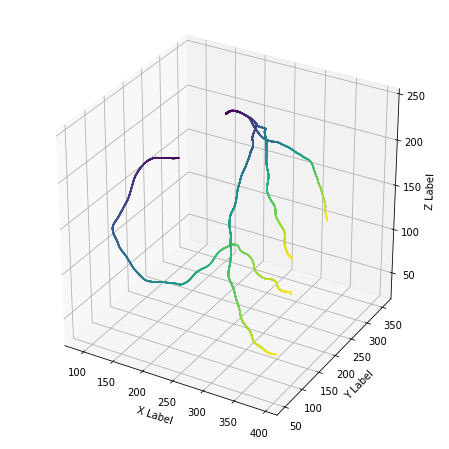

In [164]:
# plt.figure(figsize=(15, 8))

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

for i in range(4):
    points = load_points("./training/dataset06/vessel%s/reference.txt" % str(i))
    X, Y, Z = points[:, 0], points[:, 1], points[:, 2]
    X, Y, Z = X / spacing[1], Y / spacing[1], Z / spacing[0]
#     X, Y, Z = X.astype(int), Y.astype(int), Z.astype(int)
#     print("X: %.5f - %.5f" % (X.min(), X.max()))
#     print("Y: %.5f - %.5f" % (Y.min(), Y.max()))
#     print("Z: %.5f - %.5f" % (Z.min(), Z.max()))

    im = ax.scatter(X, Y, Z, s=0.3, c=np.arange(len(points)))
plt.axis("square")
# plt.axis([50, 450, 50, 450])
plt.show()

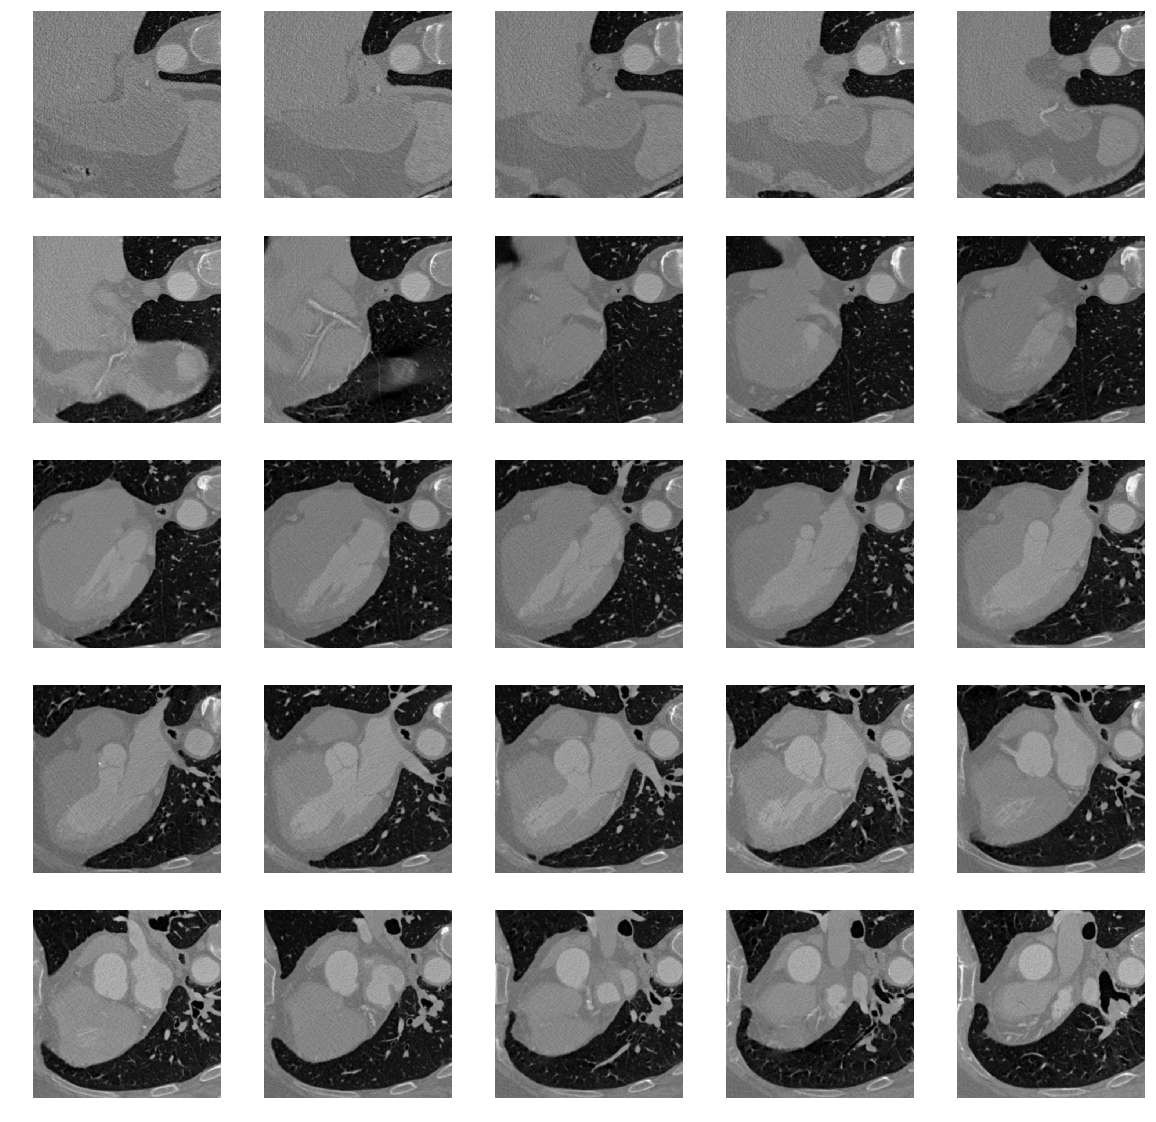

In [84]:
import matplotlib.pyplot as plt
%matplotlib inline

i = 0

# plt.figure()
f, axs = plt.subplots(5,5, figsize=(20,20))
axs = axs.flatten()

for ax in axs:
    slice_ = scan[:, :, i]
    i += 10
    ax.imshow(slice_, cmap="gray")
    ax.axis("off")
plt.show()

In [160]:
?plt.axis